#### 라이브러리 로드

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Iris Dataset 로드

In [5]:
# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 데이터프레임으로 변환
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)

# 각 샘플의 실제 품종 label을 갖는 y를 target 열로 추가
iris_df['target'] = y

# 데이터프레임 첫 5행 출력
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Iris PCA 구현

- 데이터 target value 출력
- 몇 개의 데이터로 분류되어야 하는지 확인

In [6]:
iris_df['target'].values # target label의 값들을 출력

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- [0, 1, 2] 총 3개의 label로 데이터가 구성되어 있음:
    - 각 숫자는 꽃의 품종을 의미
        - 0: sertosa
        - 1: versicolor
        - 2: virginica

#### 데이터 표준화

- PCA를 수행하기 전에 데이터를 표준화
- z-점수 표준화 (z-score standardization): 각 변수의 평균을 0, 표준편차를 1로 변환
    - 행렬 X의 각 피처에서 평균을 빼고 표준편차로 나눔

In [7]:
# z-점수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 표준화된 데이터 확인
print("표준화된 데이터의 평균: ", np.mean(X_scaled, axis=0))
print("표준화된 데이터의 표준편차: ", np.std(X_scaled, axis=0))

표준화된 데이터의 평균:  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
표준화된 데이터의 표준편차:  [1. 1. 1. 1.]


#### PCA 변환

- PCA를 적용하여 데이터를 2차원으로 축소:

In [10]:
# PCA 주성분 변환
pca = PCA(n_components=2) # 4차원의 iris 데이터를 2개의 주성분으로 축소
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# PCA 결과 확인
pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


- PCA에서 주성분 (Principal Components, PCs)은 원본 데이터의 피처 개수만큼 가질 수 있음
    - 여기서는 데이터의 주요 분산을 시각화 하기 위해 주성분 n_components를 2로 설정
- PCA 결과인 X_pca는 주성분 값들로 구성된 2차원 배열로, 각 열은 하나의 주성분을 나타냄
    - PC1(첫 번째 주성분): 원본 데이터에서 가장 큰 분산을 설명하는 축(방향), 데이터의 변동성을 가장 많이 설명하는 주성분
    - PC2(두 번째 주성분): 첫 번째 주성분과 직교(orthogonal)하며, 그 다음으로 큰 분산을 설명하는 축

#### PCA 결과 시각화

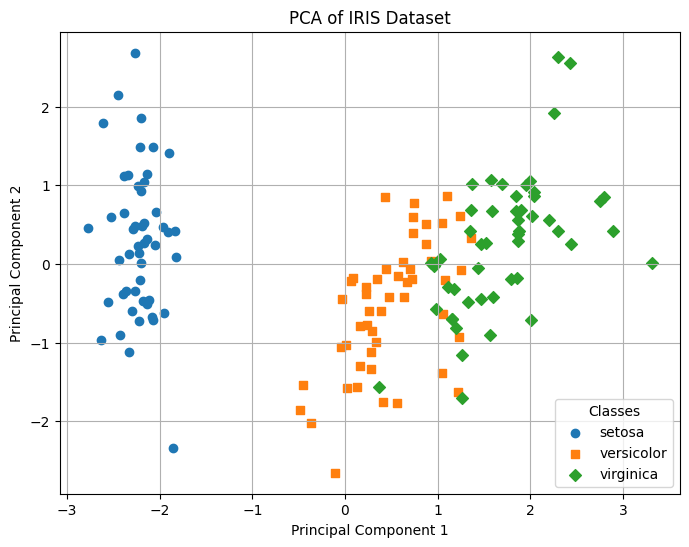

In [11]:
# PCA 결과 시각화
plt.figure(figsize=(8, 6))

# 클래스별로 다른 마커 스타일을 정의
markers = ['o', 's', 'D'] # 마커의 모양: 원(o), 사각형(s), 다이아몬드(D)

# 각 클래스를 반복하며 그리기
for i, target_name in enumerate(target_names):
    subset = pca_df[pca_df['target'] == i] # 각 클래스의 데이터 서브셋
    plt.scatter(subset['PC1'], subset['PC2'], # 주성분
                marker=markers[i],  # 클래스에 따라 마커 설정
                label=target_name)  # 레이블 설정
    
# 제목과 축 레이블 추가
plt.title("PCA of IRIS Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Classes")
plt.grid()
plt.show()
